In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [129]:
na_values = ['UNKNOWN', 'unknown', 'Unknown', 'Unknown ve', '(0.0, 0.0)', 'Unspecified', 'OTHER', 'other']

df = pd.read_csv('crashes.csv', na_values=na_values)
df_sample = df.sample(frac=.2)

## Data exploration

In [130]:
df_sample.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
421935,05/08/2019,18:56,BROOKLYN,11235.0,NaN,NaN,NaN,NaN,NaN,55 Brighton 11th street,...,NaN,NaN,NaN,NaN,4128274,Sedan,NaN,NaN,NaN,NaN
708214,02/07/2018,12:30,NaN,NaN,40.759617,-73.961975,"(40.759617, -73.961975)",1 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,3842105,Bike,NaN,NaN,NaN,NaN
1527581,06/27/2014,19:20,BROOKLYN,11211,40.714539,-73.951703,"(40.7145389, -73.9517027)",UNION AVENUE,CONSELYEA STREET,NaN,...,Lost Consciousness,NaN,NaN,NaN,359311,PASSENGER VEHICLE,BICYCLE,NaN,NaN,NaN
1682500,09/23/2013,10:23,BROOKLYN,11222,40.730064,-73.947427,"(40.7300642, -73.9474267)",CALYER STREET,MOULTRIE STREET,NaN,...,Backing Unsafely,NaN,NaN,NaN,200254,PICK-UP TRUCK,NaN,NaN,NaN,NaN
651549,05/21/2018,7:48,BROOKLYN,11207.0,40.662940,-73.895540,"(40.66294, -73.89554)",RIVERDALE AVENUE,GEORGIA AVENUE,NaN,...,NaN,NaN,NaN,NaN,3905281,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN


In [131]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207880 entries, 421935 to 1103059
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH DATE                     207880 non-null  object 
 1   CRASH TIME                     207880 non-null  object 
 2   BOROUGH                        143197 non-null  object 
 3   ZIP CODE                       143168 non-null  object 
 4   LATITUDE                       184638 non-null  float64
 5   LONGITUDE                      184638 non-null  float64
 6   LOCATION                       184214 non-null  object 
 7   ON STREET NAME                 163767 non-null  object 
 8   CROSS STREET NAME              129224 non-null  object 
 9   OFF STREET NAME                34833 non-null   object 
 10  NUMBER OF PERSONS INJURED      207879 non-null  float64
 11  NUMBER OF PERSONS KILLED       207878 non-null  float64
 12  NUMBER OF PEDESTRIANS INJURED

In [132]:
df_sample.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                           64683
ZIP CODE                          64712
LATITUDE                          23242
LONGITUDE                         23242
LOCATION                          23666
ON STREET NAME                    44113
CROSS STREET NAME                 78656
OFF STREET NAME                  173047
NUMBER OF PERSONS INJURED             1
NUMBER OF PERSONS KILLED              2
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1     71664
CONTRIBUTING FACTOR VEHICLE 2    180241
CONTRIBUTING FACTOR VEHICLE 3    206868
CONTRIBUTING FACTOR VEHICLE 4    207655
CONTRIBUTING FACTOR VEHICLE 5    207830
COLLISION_ID                          0
VEHICLE TYPE CODE 1                5635


In [133]:
# defining the dataset ID
df_sample.set_index('COLLISION_ID', inplace=True)

Dropping columns that have more than 25% null values

### Handling missing values and irrelevant data

In [134]:
# dropping columns with more than 25% missing values
threshold = len(df_sample) * 0.25
df_sample.dropna(thresh=threshold, axis=1, inplace=True)

In [135]:
# dropping rows with missing values
df_sample.isnull().sum()

CRASH DATE                           0
CRASH TIME                           0
BOROUGH                          64683
ZIP CODE                         64712
LATITUDE                         23242
LONGITUDE                        23242
LOCATION                         23666
ON STREET NAME                   44113
CROSS STREET NAME                78656
NUMBER OF PERSONS INJURED            1
NUMBER OF PERSONS KILLED             2
NUMBER OF PEDESTRIANS INJURED        0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF CYCLIST INJURED            0
NUMBER OF CYCLIST KILLED             0
NUMBER OF MOTORIST INJURED           0
NUMBER OF MOTORIST KILLED            0
CONTRIBUTING FACTOR VEHICLE 1    71664
VEHICLE TYPE CODE 1               5635
VEHICLE TYPE CODE 2              50100
dtype: int64

In [136]:
# showing dispersion measures
df_sample.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,184638.000000,184638.000000,207879.000000,207878.000000,207880.000000,207880.000000,207880.000000,207880.000000,207880.000000,207880.000000
mean,40.630560,-73.755754,0.310926,0.001506,0.056383,0.000760,0.026852,0.000087,0.223898,0.000640
std,1.951026,3.638834,0.699849,0.043454,0.248569,0.028248,0.163721,0.009305,0.659507,0.030305
min,0.000000,-201.237060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.667847,-73.974523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.720966,-73.927320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.769740,-73.866731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42.107204,0.000000,27.000000,5.000000,27.000000,2.000000,3.000000,1.000000,24.000000,5.000000


Deleting logical irrelevant columns

In [137]:
# dropping irrelevant columns
df_sample.drop([
    'VEHICLE TYPE CODE 2',
    'ZIP CODE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION',
    'NUMBER OF PERSONS INJURED',
    'NUMBER OF PERSONS KILLED',
    ], axis=1, inplace=True)

Simplifying feature names

In [138]:
# renaming columns
df_sample.rename(columns={
    'CRASH DATE': 'DATE',
    'CRASH TIME': 'TIME',
    'LATITUDE': 'LAT',
    'LONGITUDE': 'LON',
    'ON STREET NAME': 'ON_STREET',
    'CROSS STREET NAME': 'CROSS_STREET',
    'NUMBER OF PERSONS INJURED': 'INJURED',
    'NUMBER OF PERSONS KILLED': 'KILLED',
    'NUMBER OF PEDESTRIANS INJURED': 'PED_INJURED',
    'NUMBER OF PEDESTRIANS KILLED': 'PED_KILLED',
    'NUMBER OF CYCLIST INJURED': 'CY_INJURED',
    'NUMBER OF CYCLIST KILLED': 'CY_KILLED',
    'NUMBER OF MOTORIST INJURED': 'MOT_INJURED',
    'NUMBER OF MOTORIST KILLED': 'MOT_KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1': 'FACTOR',
    'CONTRIBUTING FACTOR VEHICLE 2': 'FACTOR2',
    'VEHICLE TYPE CODE 1': 'VEHICLE'
    }, inplace=True)

#### Cleaning the target variable

Dropping all rows with null in the target varible

In [139]:
# Dropping rows with missing values in the 'VEHICLE' column
df_sample.dropna(subset=['VEHICLE'], inplace=True)

df_sample.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
CROSS_STREET    object
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

In [140]:
df_sample['ON_STREET'] = df_sample['ON_STREET'].str.upper()
df_sample['CROSS_STREET'] = df_sample['CROSS_STREET'].str.upper()
df_sample['BOROUGH'] = df_sample['BOROUGH'].str.upper()
df_sample['FACTOR'] = df_sample['FACTOR'].str.upper()

Dropping low occurencies of categories in the target variable VEHICLE

In [141]:
# converting VEHICLE column to uppercase
df_sample['VEHICLE'] = df_sample['VEHICLE'].str.upper()

In [142]:
# Dropping low occurrence values in the 'VEHICLE' column
df_filtered = df_sample.groupby('VEHICLE').filter(lambda x: len(x) >= 10)


In [143]:
# Showing the most frequent values in the 'VEHICLE' column
df_filtered['VEHICLE'].value_counts()

VEHICLE
SEDAN                                  58239
STATION WAGON/SPORT UTILITY VEHICLE    45218
PASSENGER VEHICLE                      41750
SPORT UTILITY / STATION WAGON          17954
TAXI                                    8223
PICK-UP TRUCK                           4673
4 DR SEDAN                              4056
VAN                                     3473
BUS                                     3439
BOX TRUCK                               2432
BIKE                                    1452
LARGE COM VEH(6 OR MORE TIRES)          1424
SMALL COM VEH(4 TIRES)                  1352
MOTORCYCLE                              1265
LIVERY VEHICLE                          1044
TRACTOR TRUCK DIESEL                    1039
AMBULANCE                                751
DUMP                                     381
CONVERTIBLE                              356
E-BIKE                                   292
2 DR SEDAN                               278
FLAT BED                                 252
PK

Finding and excluding outliers

In [144]:
# Showing 
df_filtered.describe()

,PED_INJURED,PED_KILLED,CY_INJURED,CY_KILLED,MOT_INJURED,MOT_KILLED
count,201753.000000,201753.000000,201753.000000,201753.000000,201753.000000,201753.000000
mean,0.051167,0.000709,0.026825,0.000084,0.227238,0.000649
std,0.238154,0.027167,0.163675,0.009179,0.664389,0.030600
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,2.000000,3.000000,1.000000,24.000000,5.000000


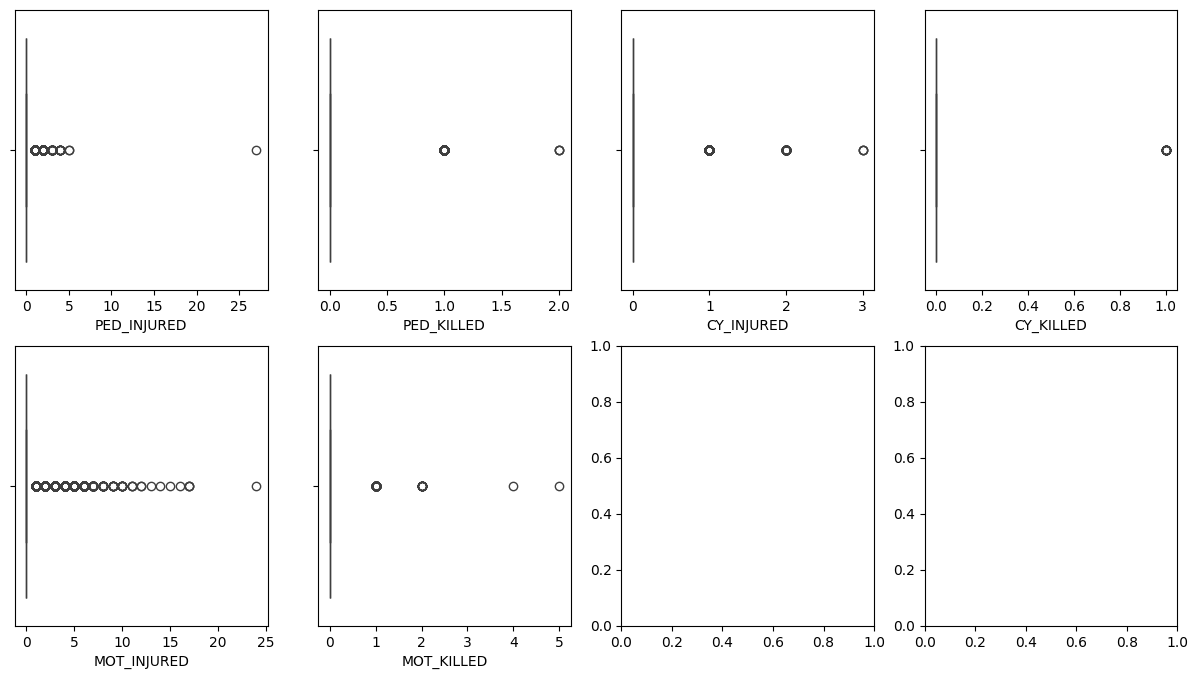

In [145]:
numerical_columns = df_filtered.select_dtypes(include='number').columns.tolist()

img, axs = plt.subplots(2, 4, figsize=(15, 8))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_filtered[column], ax=axs[i//4, i%4])

plt.show()

#### Filling missing values with their mode and mean for categorical and numerical values respectively

In [146]:
# filling all categorical missing values with their mode
categorical_columns = df_filtered.select_dtypes(include='object').columns.tolist()

for column in categorical_columns:
    df_filtered[column] = df_filtered[column].str.strip()
    df_filtered.fillna({column: df_filtered[column].mode()[0]}, inplace=True)

# filling numberical missing values with its mean
numerical_columns = df_filtered.select_dtypes(include='number').columns.tolist()

for column in numerical_columns:
    df_filtered.fillna({column: df_filtered[column].mean()}, inplace=True)


In [147]:
df_filtered.isnull().sum()

DATE            0
TIME            0
BOROUGH         0
ON_STREET       0
CROSS_STREET    0
PED_INJURED     0
PED_KILLED      0
CY_INJURED      0
CY_KILLED       0
MOT_INJURED     0
MOT_KILLED      0
FACTOR          0
VEHICLE         0
dtype: int64

### Parsing categorical colums to numeric representation

Based on that most of the categorical columns have many categories One-Hot enconding is not suitable therefore Label Encoding would be a better solution

In [148]:
df_filtered.dtypes

DATE            object
TIME            object
BOROUGH         object
ON_STREET       object
CROSS_STREET    object
PED_INJURED      int64
PED_KILLED       int64
CY_INJURED       int64
CY_KILLED        int64
MOT_INJURED      int64
MOT_KILLED       int64
FACTOR          object
VEHICLE         object
dtype: object

In [149]:
from sklearn.preprocessing import LabelEncoder
# creating a label encoder
label_encoder = LabelEncoder()
# categorical columns that have to be encoded
categorical_columns = df_filtered[['BOROUGH', 'ON_STREET', 'CROSS_STREET', 'FACTOR', 'VEHICLE']].columns.tolist()
# encoding categorical columns
for column in categorical_columns:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])


Creating new column with month and time instead of date and time

In [150]:
# taking only month and time in hours from the 'DATE' and 'TIME' columns
df_filtered['MONTH'] = df_filtered['DATE'].apply(lambda x: int(x.split('/')[0]))
df_filtered['TIME'] = df_filtered['TIME'].apply(lambda x: float(x.replace(':', '.')))

df_filtered.drop('DATE', axis=1, inplace=True)


In [151]:
df_filtered[['MONTH', 'TIME']].head()

,MONTH,TIME
COLLISION_ID,,
4128274,5,18.56
3842105,2,12.30
359311,6,19.20
200254,9,10.23
3905281,5,7.48


## Training and model selection

### Data spliting and target variable balancing using SMOTE

In [152]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df_filtered.drop('VEHICLE', axis=1)
y = df_filtered['VEHICLE']

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

X = preprocessing.scale(X)

splits = [20, 25, 30]
scores = { 'kscores': [], 'dscores': [] }

for split in splits:
    X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split/100)

    kmodel = KNeighborsClassifier()
    dmodel = DecisionTreeClassifier()

    kscore = cross_val_score(kmodel, X_train, y_train, cv=5, scoring='accuracy').mean()
    dscore = cross_val_score(dmodel, X_train, y_train, cv=5, scoring='accuracy').mean()

    scores['kscores'].append(kscore)
    scores['dscores'].append(dscore)

d_max_score = np.max([score for score in scores['dscores']])
d_max_split = splits[np.argmax([score for score in scores['dscores']])]

print(f"DTC max score: {d_max_score}")
print(f"DTC max split: {d_max_split}")

k_max_score = np.max([score for score in scores['kscores']])
k_max_split = splits[np.argmax([score for score in scores['kscores']])]

print(f"KNN max score: {k_max_score}")
print(f"KNN max split: {k_max_split}")

DTC max score: 0.25851001239211424
DTC max split: 20
KNN max score: 0.281694114492189
KNN max split: 20



Finding the best hyperprameters for DecisionTreeClassifier

In [154]:
from sklearn.model_selection import GridSearchCV

# applying the best testing split founded above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=d_max_split)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(dt, param_grid, cv=5)

# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
d_best_params = grid_search_dt.best_params_
best_score = grid_search_dt.best_score_

print("Best hyper parameter: ", d_best_params)
print("Best score:", best_score)


Best hyper parameter:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score: 0.36489816516138796


Finding the best hyperparamenters for KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier

# applying the best split founded in above cell
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k_max_split)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding score
k_best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", k_best_params)
print("Best Score:", best_score)


Showing the testing accuracy and plotting it on a confusion matrix

In [ ]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(**k_best_params)
dt = DecisionTreeClassifier(**d_best_params)

knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

k_y_pred = knn.predict(X_test)
d_y_pred = dt.predict(X_test)

k_acc = accuracy_score(y_test, k_y_pred)
d_acc = accuracy_score(y_test, d_y_pred)

print(f"KNN test score: {k_acc}\nDTC test score: {d_acc}")


KNN test score: 0.36
DTC test score: 0.32


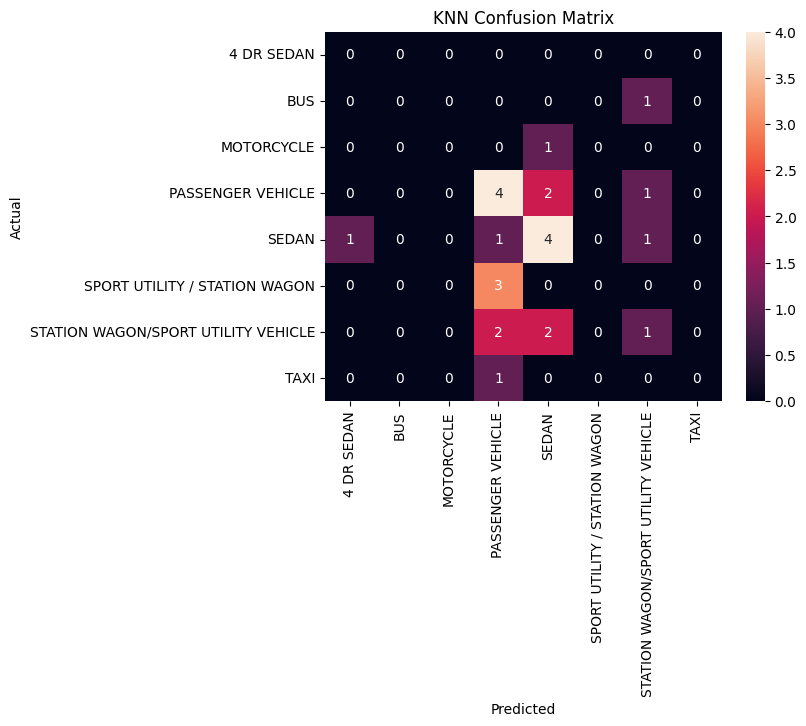

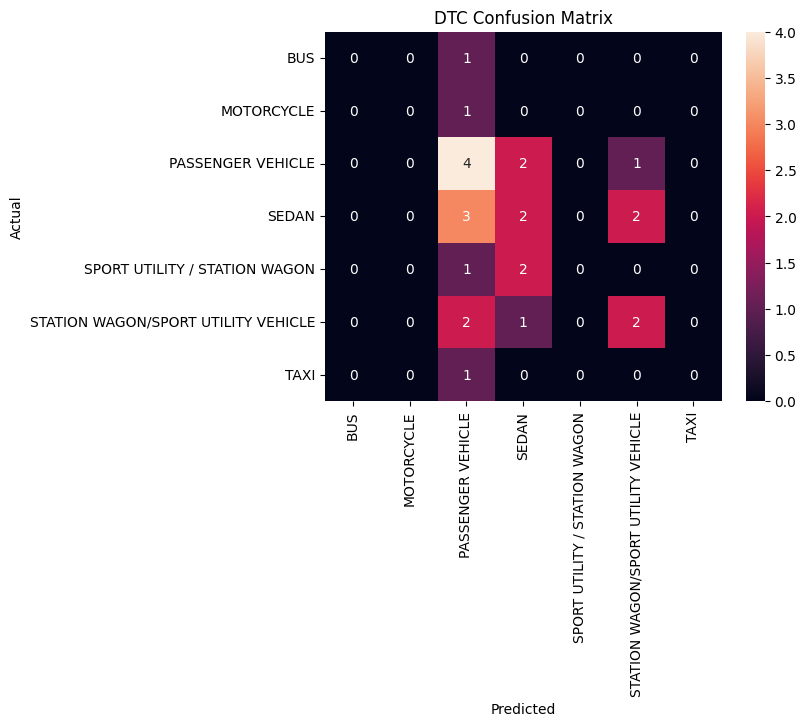

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

kcm = confusion_matrix(y_test, k_y_pred)
dcm = confusion_matrix(y_test, d_y_pred)

kreport = classification_report(y_test, k_y_pred, output_dict=True)
dreport = classification_report(y_test, d_y_pred, output_dict=True)

kenlabels = [int(label) for label in list(kreport.keys()) if label.isdigit()]
labels = label_encoder.inverse_transform(kenlabels)

sns.heatmap(kcm, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual')
plt.show()

denlabels = [int(label) for label in list(dreport.keys()) if label.isdigit()]
labels = label_encoder.inverse_transform(denlabels)

sns.heatmap(dcm, annot=True, fmt='d', yticklabels=labels, xticklabels=labels)
plt.title('DTC Confusion Matrix')
plt.ylabel('Actual')
plt.show()

## References

- https://www.analyticsvidhya.com/blog/2021/04/how-to-handle-missing-values-of-categorical-variables/
- https://www.linkedin.com/pulse/title-label-encoding-one-hot-data-preprocessing-shivani-singh
- https://www.linkedin.com/pulse/top-6-machine-learning-algorithms-classification-jagrat-patel/